# Introduction
A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will evaluate the impact of incorrect labels on a number of different classifiers.

We have provided a number of code snippets you can use during this assignment. Feel free to modify them or replace them.


## Dataset
The dataset you will be using is the [Adult Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). This dataset was created by Ronny Kohavi and Barry Becker and was used to predict whether a person's income is more/less than 50k USD based on census data.

### Data preprocessing
Start by loading and preprocessing the data. Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14).

### Data classification
Choose at least 4 different classifiers and evaluate their performance in predicting the target variable. 

#### Preprocessing
Think about how you are going to encode the categorical variables, normalization, whether you want to use all of the features, feature dimensionality reduction, etc. Justify your choices 

A good method to apply preprocessing steps is using a Pipeline. Read more about this [here](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) and [here](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf). 

#### Data visualization
Calculate the correlation between different features, including the target variable. Visualize the correlations in a heatmap. A good example of how to do this can be found [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec). 

Select a features you think will be an important predictor of the target variable and one which is not important. Explain your answers.

#### Evaluation
Use a validation technique from the previous lecture to evaluate the performance of the model. Explain and justify which metrics you used to compare the different models. 

In [49]:
import pandas as pd
import numpy as np

In [50]:
# This can be used to load the dataset
data = pd.read_csv("adult_all.csv", header=None, na_values='?')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
#set columns
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
                   'capital-gain','capital-loss','hours-per-week','native-country','income']
# check nan values
print(data.isnull().sum()/len(data)*100)

# nan values in workclass
data_nan = data[data.isnull().T.any()]
print(data_nan[['workclass','occupation','native-country']])

# categorical variables
categorical_ix = data.drop(['income'], axis=1).select_dtypes(include=['object']).columns.tolist()
# nan values 
for cat in categorical_ix:
    data[cat].fillna(data[cat].value_counts().index[0], inplace=True)
    print(f' {cat} have categorials :', data[cat].unique())
# reducing categories
data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data['education'] = data['education'].replace(['12th','11th','9th','10th','5th-6th','7th-8th','Preschool','1st-4th'],'under_HS')
data['education'] = data['education'].replace(['Assoc-acdm','Assoc-voc'],'Assoc')
data['education'] = data['education'].replace(['Some-college','Prof-school'],'College')
data['education'] = data['education'].replace(['Masters','Doctorate'],'Post-graduate')
data['workclass'] = data['workclass'].replace(['State-gov','Federal-gov','Local-gov'],'Gov')
data['workclass'] = data['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self-emp')


# numerical variables
numerical_ix = data.drop(['income'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
# nan values
for num in numerical_ix:
    data[num].fillna((data[num].mean()), inplace=True)
print('Categorical variables include: ',categorical_ix,'\n'
     'Numerical variables include:',numerical_ix )

display(data.head())
display(data.info())    

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64
       workclass      occupation native-country
14       Private    Craft-repair            NaN
27           NaN             NaN          South
38       Private           Sales            NaN
51       Private   Other-service            NaN
61           NaN             NaN            NaN
...          ...             ...            ...
48769        NaN             NaN  United-States
48800        NaN             NaN         Canada
48812        NaN             NaN  United-States
48826  Local-gov  Prof-specialty            NaN
48838        NaN             NaN  United-States

[36

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,under_HS,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

In [53]:
# encode target variables
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})

In [54]:
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
# !pip install heatmapz
from heatmap import heatmap, corrplot
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Most related features to income: 
 income                          1.000000
marital-status_Married          0.436624
relationship_Husband            0.403791
education-num                   0.332613
marital-status_Never-married    0.318782
age                             0.230369
hours-per-week                  0.227687
relationship_Own-child          0.225691
capital-gain                    0.223013
sex_Male                        0.214628
sex_Female                      0.214628
education_Post-graduate         0.214105
occupation_Exec-managerial      0.210938
relationship_Not-in-family      0.190372
education_Bachelors             0.180371
education_under_HS              0.165922
occupation_Other-service        0.155254
capital-loss                    0.147554
relationship_Unmarried          0.143642
education_HS-grad               0.130706
Name: income, dtype: float64
Most irrelevent features to income: 
 native-country_Cuba                  0.000885
native-country_Hong             

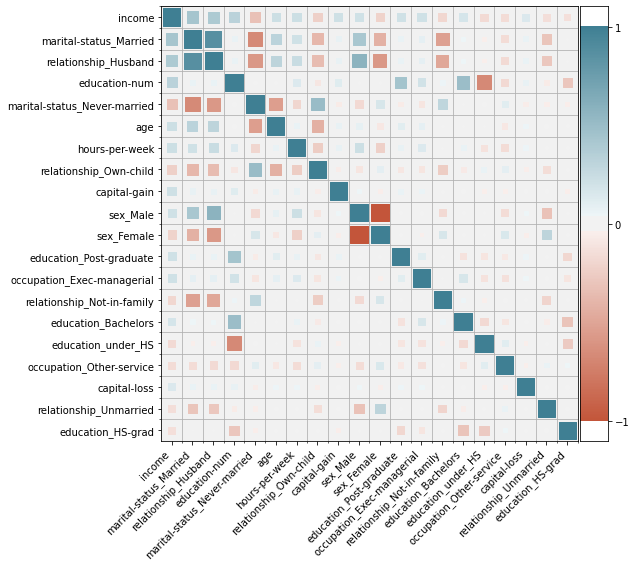

In [55]:
# Data preprocessing
# corr
X = pd.get_dummies(data,columns=categorical_ix)
# X_cat = pd.get_dummies(data[['income'] + categorical_ix], columns=categorical_ix)   # X_cat does only contain the income and categorical features

X2 = StandardScaler().fit_transform(X)
XX = pd.DataFrame(X2,columns=X.columns)
corr = XX.corr()
abs_corr = abs(corr['income'])

# highcorr_index = np.argsort(abs_corr)
highcorr_index = abs_corr.sort_values(ascending=False)     # sorted by largest correlation to income

aa=highcorr_index.index[:20].tolist()
print("Most related features to income: \n",abs_corr.sort_values(ascending=False)[:20])
print("Most irrelevent features to income: \n",abs_corr.sort_values(ascending=True)[:20])
corr2 = XX[aa].corr()
plt.figure(figsize=(8, 8))
corrplot(corr2, size_scale=300)

In [56]:
# categorical features reduction via chi-squre
from scipy.stats import chi2_contingency

factors_paired = [(i,j) for i in categorical_ix for j in categorical_ix] 
chi2, p_values = [], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((8,8)) # shape it as a matrix
p_values = np.array(p_values).reshape((8,8))
chi2 = pd.DataFrame(chi2, index=categorical_ix, columns=categorical_ix) # then a df for convenience
p_values = pd.DataFrame(p_values, index=categorical_ix, columns=categorical_ix)
print(p_values)

                    workclass      education  marital-status     occupation  \
workclass        0.000000e+00   0.000000e+00    0.000000e+00   0.000000e+00   
education        0.000000e+00   0.000000e+00   1.040050e-238   0.000000e+00   
marital-status   0.000000e+00  1.040050e-238    0.000000e+00   0.000000e+00   
occupation       0.000000e+00   0.000000e+00    0.000000e+00   0.000000e+00   
relationship     0.000000e+00   0.000000e+00    0.000000e+00   0.000000e+00   
race            1.335708e-104  7.172835e-139   2.694471e-233  7.204455e-202   
sex             6.363573e-202   1.927606e-31    0.000000e+00   0.000000e+00   
native-country   3.817940e-30   0.000000e+00    2.581752e-36   0.000000e+00   

                 relationship           race            sex  native-country  
workclass        0.000000e+00  1.335708e-104  6.363573e-202    3.817940e-30  
education        0.000000e+00  7.172835e-139   1.927606e-31    0.000000e+00  
marital-status   0.000000e+00  2.694471e-233   0.00000

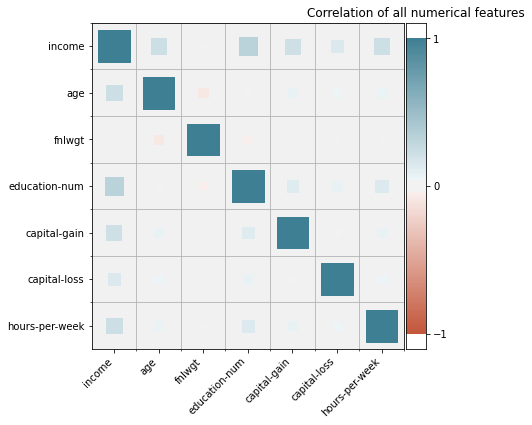

In [57]:
# visualize numerical
X_num = data[['income'] + numerical_ix].copy()

plt.figure(figsize=(6, 6))
corrplot(X_num.corr(), size_scale=1000)
plt.title('Correlation of all numerical features')
plt.tight_layout()
plt.show()

1. From the corr for all type of datas, we can see that fnwlgt and native countries are the most irrelevant features to the income. Thus can be reduced.
2. From the corr plot of most revelent features, we can see that education and education num are highly related, thus we only retain education-num.
3. From the chi-test for categorical data, we can further validate that all remain categorical features are not related to each other.

In [58]:
# drop relevant columns
data =data.drop(['fnlwgt','native-country','relationship'], axis = 1) 
# data =data.drop(['fnlwgt','native-country',], axis = 1) 

Data Preprocessing:

First, from the data.info(), we can see that there are unknown data in 'workclass', 'occupation' and 'native country'. By pulling out these nan data, it can be found that nan values appear at the same time in 'workclass' and 'occupation'. Since the unknown data still have many information, we consider replace the unknown data with the value that most likely is. For categorical data, this is the category that most frequently appear. And as for numerical data, this is the average of the data.

We can see from the data.unique() that there are many category class in one category, which results in high dimension in the future evaluation. Some of the classes can be combined without much effect on further use. Here, we decide to simplify the marital status, education and workclass. Then we notify that education and education_num are highly connected, one of them can be dropped. 



Feature reduction:

We apply feature reduction mainly based on two aspects. First, in case the feature is highly related to another feature, which means both of the features provide similar information for predicting the income, it is good to drop one of the features. Then, we consider how much influence the feature may have on predicting the income class, those who has almost little correlation to income can be dropped.

Notice that two type of features exist in the data. For categorical data, it is common to use chi-2 test to consider the correlation. As shown in the result, there is almost no relationship between each other. Then considering the correlation between all features and between features and income. From the visualization of correlation between the 20 most related-to-income feature classes, it can be obtained that 'relationship' and 'marital status' are high related. Then it is better to drop 'relationship' since it has higher correlation with income. From the list of the 20 most unrelated-to-income feature class, it can be clearly found that 'fngwl' and 'native country' have little correlation with the income, thus they can be dropped.

### Data classification
Choose at least 4 different classifiers and evaluate their performance in predicting the target variable. 

#### Evaluation
Use a validation technique from the previous lecture to evaluate the performance of the model. Explain and justify which metrics you used to compare the different models. 

The four models that are chosen for the classification tasks are:

1. Logistic Regression
2. Decision Tree
3. Random Forest Classifier
4. Neural Network

These models are used in its standard form as they are provided by sklearn. That is, no hyperparameters are specified to further increase model performance. These standard models are then evaluated on three metrics to see its classification performance. These metrics are the precision, recall, and the f1-score which combines the two. These three metrics can be used to give an accurate and complete overview of the classification performance. Furthermore, the normalised confusion matrices are computed to visualy understand the classification performance.

The performance evaluation is done by means of k-fold cross validation. This allows to give an insight into how well the model performs on a wider range of input data. By computing the evaluation metrics on each k-fold validation set, it can be seen concluded whether the model is sensitive to its input data. When no significant difference are observed between these k-fold evaluation metrics, it can be assured that the model does not overfit the data.

Finally, it should be noted that the confusion matrices are constructed by combining all k-fold validation runs. This results in an averaged confusion matrix, averaged over each k-fold validation run.

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import itertools

# Apply your model to feature array X and labels y
def apply_model(model, X, y, ct):

    # Perform k_fold cross validation on the model
    k = 5
    k_fold = KFold(k, shuffle=True, random_state=1)

    all_metric_scores = {
        'precision':   np.zeros((k, 2)),    # Store precision score for each of the 2 labels for all k-fold validation runs
        'recall':      np.zeros((k, 2)),    # Store recall score " "
        'f1-score':    np.zeros((k, 2))     # Store f1_score score " "
        }

    predicted_targets = np.array([])    # store predicted labels for the k validation runs; needed to construct average confusion matrix
    actual_targets = np.array([])       # store actual labels for the k validation runs; needed to construct average confusion matrix

    print(f'------ {k}-fold cross validation:')
    for k_idx, (train_idx, test_idx) in enumerate(k_fold.split(X)):
        train_x, test_x = X.iloc[train_idx], X.iloc[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]

        pipeline = Pipeline(steps=[('t', ct), ('m', model)])    # initiate and setup pipeline
        pipeline.fit(train_x, train_y)                          # train model in pipeline
        predicted_labels = pipeline.predict(test_x)             # test trained model

        predicted_targets = np.append(predicted_targets, predicted_labels)  # append values
        actual_targets = np.append(actual_targets, test_y)                  # append values
    
        # Evaluate model for the k^th validation run
        all_metric_scores = evaluate_model(predicted_labels, test_y, k_idx, all_metric_scores)

        print(f"Finished with k={k_idx+1}/5 evaluation")
    
    print_evaluation_scores(all_metric_scores, k)

    return predicted_targets, actual_targets

def evaluate_model(predicted_labels, y_test, k_idx, all_metric_scores):
    classification_scores = classification_report(y_test, predicted_labels, output_dict=True)
    for metric in all_metric_scores.keys():
        for label in [0, 1]:
            score = classification_scores[str(label)][metric]
            all_metric_scores[metric][k_idx, label] = score
    return all_metric_scores

def print_evaluation_scores(all_metric_scores, k):
    print('\n------ Metric scores:')
    for metric in all_metric_scores.keys():
        df = pd.DataFrame(all_metric_scores[metric], columns=['less than 50K', 'greater than 50K'], index=range(1, k+1)).round(3)

        print(f"Average {metric} for the {k}-fold validation runs")
        print('\t\t avg \t std')
        for label in [0, 1]:
            label_name = 'less than 50K' if label == 0 else 'more than 50K' 
            print(f"{label_name} \t {round(df.mean()[label],3)}\t {round(df.std()[label],4)}")
    return

In [60]:
from sklearn.compose import ColumnTransformer

numerical_ix = data.drop(['income'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_ix = data.select_dtypes(include=['object']).columns.tolist()

# Define your preprocessing steps here
steps = [('num', StandardScaler(), numerical_ix),
         ('cat', OneHotEncoder(), categorical_ix)]

# Combine steps into a ColumnTransformer
ct = ColumnTransformer(steps)

In [61]:
# Define input parameters
X = data.drop(['income'], axis=1)
y = data['income']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define the models to evaluate
models = {
    'Logistic Regression':        LogisticRegression(),
    'Decision Tree':              DecisionTreeClassifier(),
    'Random Forest Classifier':   RandomForestClassifier(),
    'Neural Network':             MLPClassifier()
    }

conf_matrix_data = {}

for label in models.keys():
    print('\n\n\n******************************')
    print(f"Start of the {label} evaluation ...")
    print('******************************')
    model = models[label]
    pred_labels, true_labels = apply_model(model, X, y, ct)

    conf_matrix_data[label] = [pred_labels, true_labels]




******************************
Start of the Logistic Regression evaluation ...
******************************
------ 5-fold cross validation:
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation

------ Metric scores:
Average precision for the 5-fold validation runs
		 avg 	 std
less than 50K 	 0.876	 0.0037
more than 50K 	 0.728	 0.0132
Average recall for the 5-fold validation runs
		 avg 	 std
less than 50K 	 0.932	 0.003
more than 50K 	 0.582	 0.0073
Average f1-score for the 5-fold validation runs
		 avg 	 std
less than 50K 	 0.903	 0.0016
more than 50K 	 0.647	 0.0074



******************************
Start of the Decision Tree evaluation ...
******************************
------ 5-fold cross validation:
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation

------ Metric scores:

In [62]:
# Function used to plot confusion matrix
def generate_confusion_matrix(fig, ax, cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    ax.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def construct_conf_matrix(predicted_labels, y_test, model_name, fig, ax):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predicted_labels)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    generate_confusion_matrix(fig, ax, cnf_matrix, classes=['less than 50K', 'greater than 50K'], normalize=True, title=f'Normalized confusion matrix for {model_name}')
    return 

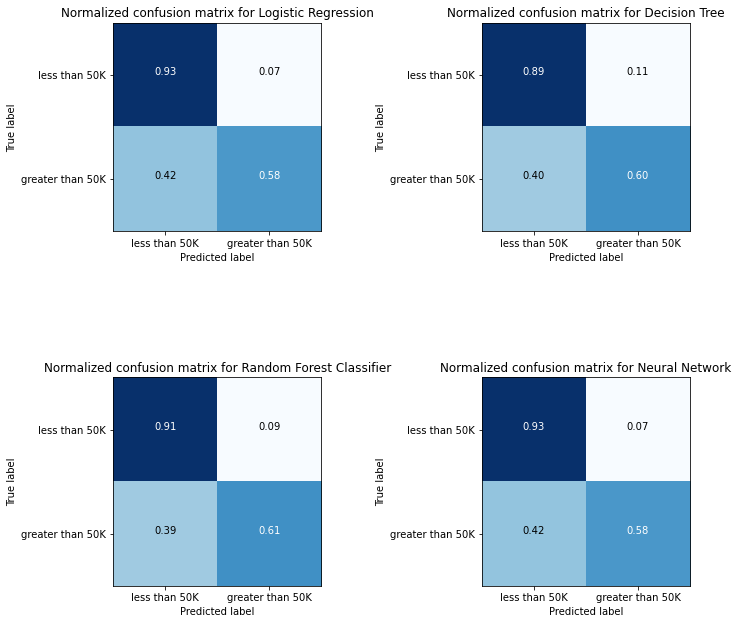

In [17]:
fig, axes = plt.subplots(2, len(models)//2, figsize=(10, 10))

i = 0
for label in models.keys():
    construct_conf_matrix(conf_matrix_data[label][0], conf_matrix_data[label][1], label, fig, ax=axes[i//2, i%2])
    i+=1
fig.tight_layout()
plt.show()

By looking at the average f1-scores for the four models, it can be seen that the classification of the label 'less than 50K' attains good performance across all models (f1-scores of 0.903, 0.883, 0.897, 0.905, for the models respectively). For this label, it is also seen that both the precision and recall give high scores.

The classification of the label 'greater than 50K' is seen be less accurate. The f1-scores are 0.647, 0.615, 0.648, and 0.651, respectively. This f1-score is seen to follow from a similar score for both the precision and recall for all models, where all values range between 0.582, and 0.736. It can therefore be concluded that all models give similar performance, and there is no significant observable difference between the four models, although the Neural Network attains a slightly higher f1-score.

Furthermore, the standard deviations of the evaluation metrics, as computed based on the k-fold validation runs, are computed. These values turn out to be small, and no significant outlier is observed. From this it can be concluded that the combination of dataset and classification model is not sensitive to overfitting. 

### Label perturbation
To evaluate the impact of faulty labels in a dataset, we will introduce some errors in the labels of our data.


#### Preparation
Start by creating a method which alters a dataset by selecting a percentage of rows randomly and swaps labels from a 0->1 and 1->0. 


In [63]:
from sklearn.utils import shuffle

"""Given a label vector, create a new copy where a random fraction of the labels have been flipped."""
def pertubate(y: np.ndarray, fraction: float) -> np.ndarray:
    copy = data.copy()
    copy = shuffle(copy)
    fraction = fraction
    rows = int(fraction * len(data))
    copy[:rows]['income'].replace([1], 2, inplace=True)
    copy[:rows]['income'].replace([0], 1, inplace=True)
    copy[:rows]['income'].replace([2], 0, inplace=True)
    copy.sort_index(axis=0,ascending=True, inplace=True)
    # Flip fraction*len(data) of the labels in copy
    return copy

In [64]:
n = 20
a = np.random.randint(0,2,n)
print(a)
pertubate(a, 0.2)

[1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1]


,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,Gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,0
1,50,Self-emp,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,0
3,53,Private,under_HS,7,Married,Handlers-cleaners,Black,Male,0,0,40,1
4,28,Private,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,White,Female,0,0,36,1
48838,64,Private,HS-grad,9,Widowed,Prof-specialty,Black,Male,0,0,40,1
48839,38,Private,Bachelors,13,Married,Prof-specialty,White,Male,0,0,50,0
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,1


In [65]:
pertubate(a, fraction=0.1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,Gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,0
1,50,Self-emp,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,0
3,53,Private,under_HS,7,Married,Handlers-cleaners,Black,Male,0,0,40,0
4,28,Private,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,White,Female,0,0,36,0
48838,64,Private,HS-grad,9,Widowed,Prof-specialty,Black,Male,0,0,40,0
48839,38,Private,Bachelors,13,Married,Prof-specialty,White,Male,0,0,50,0
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,0


#### Analysis
Create a number of new datasets with perturbed labels, for fractions ranging from `0` to `0.5` in increments of `0.1`.

Perform the same experiment you did before, which compared the performances of different models except with the new datasets. Repeat your experiment at least 5x for each model and perturbation level and calculate the mean and variance of the scores. Visualize the change in score for different perturbation levels for all of the models in a single plot. 

State your observations. Is there a change in the performance of the models? Are there some classifiers which are impacted more/less than other classifiers and why is this the case?

In [66]:
# Function used to plot confusion matrix
def generate_confusion_matrix(fig, ax, cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')
        

    ax.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    ax.set_title(title)
    # fig.colorbar()

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    # fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [67]:
def apply_model_perp(model, X, y, ct):    

    # Perform k_fold cross validation on the model
    k_fold = KFold(5, shuffle=True, random_state=1)

    predicted_targets = np.array([])    # store predicted labels for the k validation runs; needed for average confusion matrix
    actual_targets = np.array([])       # store actual labels for the k validation runs; needed for average confusion matrix

    #fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    i = 0
    for train_idx, test_idx in k_fold.split(X):
        train_x, test_x = X.iloc[train_idx], X.iloc[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]

        pipeline = Pipeline(steps=[('t', ct), ('m', model)])    # initiate and setup pipeline
        pipeline.fit(train_x, train_y)                          # train model in pipeline
        predicted_labels = pipeline.predict(test_x)             # test trained model

        predicted_targets = np.append(predicted_targets, predicted_labels)  # append values
        actual_targets = np.append(actual_targets, test_y)                  # append values
    
        # Evaluate model for the k^th validation run
        evaluate_model_perp(predicted_labels, test_y)
        
        
        
        i += 1
        print(f"Finished with k={i}/5 evaluation")
    
    # Evaluate average result from the k_fold cross validation
    cnf = evaluate_model_perp(predicted_targets, actual_targets)
    

    #fig.tight_layout()
    #plt.show()
    return cnf

def evaluate_model_perp(predicted_labels, y_test):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predicted_labels)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    #generate_confusion_matrix(fig, ax, cnf_matrix, classes=['less than 50K', 'greater than 50K'], normalize=True, title='Normalized confusion matrix')

    return cnf_matrix

In [33]:
# Code
reg_models = {}
for i in range(0, 5, 1):
    x = i/10
    model = LogisticRegression()
    Y = pertubate(y, fraction=x)['income']
    reg_models["string{0}".format(x)] = apply_model_perp(model, X, Y, ct)

Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation


In [68]:
reg_models

{'string0.0': array([[34620,  2535],
        [ 4882,  6805]], dtype=int64),
 'string0.1': array([[32117,  2554],
        [ 8391,  5780]], dtype=int64),
 'string0.2': array([[29463,  2750],
        [11672,  4957]], dtype=int64),
 'string0.3': array([[26494,  3119],
        [14735,  4494]], dtype=int64),
 'string0.4': array([[23242,  3763],
        [17349,  4488]], dtype=int64)}

In [69]:
dec_tree_models = {}
for i in range(0, 5, 1):
    x = i/10
    model = DecisionTreeClassifier()
    Y = pertubate(y, fraction=x)['income']
    dec_tree_models["string{0}".format(x)] = apply_model_perp(model, X, Y, ct)
    
ran_for_models = {}
for i in range(0, 5, 1):
    x = i/10
    model = RandomForestClassifier()
    Y = pertubate(y, fraction=x)['income']
    ran_for_models["string{0}".format(x)] = apply_model_perp(model, X, Y, ct)
    

Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished

In [70]:
from sklearn.neural_network import MLPClassifier
MLP_models = {}
for i in range(0, 5, 1):
    x = i/10
    model = MLPClassifier()
    Y = pertubate(y, fraction=x)['income']
    MLP_models["string{0}".format(x)] = apply_model_perp(model, X, Y, ct)

Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation
Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation


In [71]:
def calculate_diagonal(matrix):
    total = np.sum(matrix)
    predicted_correctly = 0
    
    for i in range(len(matrix)):
        predicted_correctly += matrix[i][i]
    #print("score for C_value", C_value, "is:", (predicted_correctly/numb)*100)
    return((predicted_correctly/total))

scores_reg = []
for matrix in reg_models.values():    
    scores_reg.append(calculate_diagonal(matrix))
    
scores_dt = []
for matrix in dec_tree_models.values():    
    scores_dt.append(calculate_diagonal(matrix))

scores_rf = []
for matrix in ran_for_models.values():    
    scores_rf.append(calculate_diagonal(matrix))
    
scores_MLP = []
for matrix in MLP_models.values():    
    scores_MLP.append(calculate_diagonal(matrix))

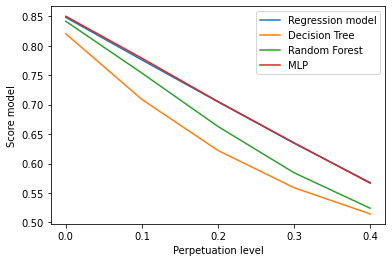

In [72]:
plt.plot(range(0, 5, 1), scores_reg,  label='Regression model')
plt.plot(range(0, 5, 1), scores_dt, label='Decision Tree')
plt.plot(range(0, 5, 1), scores_rf, label='Random Forest')
plt.plot(range(0, 5, 1), scores_MLP, label='MLP')
plt.legend()
plt.xlabel("Perpetuation level")
plt.ylabel("Score model")
plt.xticks(np.arange(5), [0.0,0.1,0.2,0.3,0.4])
plt.show()

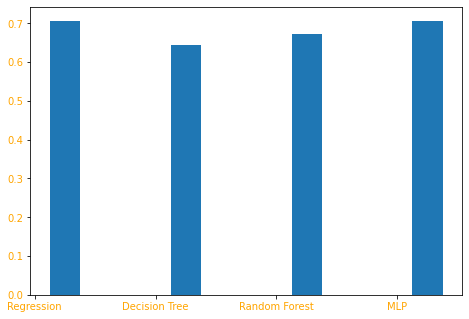

In [91]:
from statistics import mean
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Regression', 'Decision Tree', 'Random Forest', 'MLP']
means = [mean(scores_reg), mean(scores_dt), mean(scores_rf), mean(scores_MLP)]
variances = [np.var(scores_reg), np.var(scores_dt), np.var(scores_rf), np.var(scores_MLP)]
data= [means, variances]
X = np.arange(4)
ax.bar(X + 0.25, data[0], width = 0.25)
plt.xticks(np.arange(len(names)), names, color='orange')
plt.yticks(color='orange')
ax.set_xticklabels(names)
plt.show()

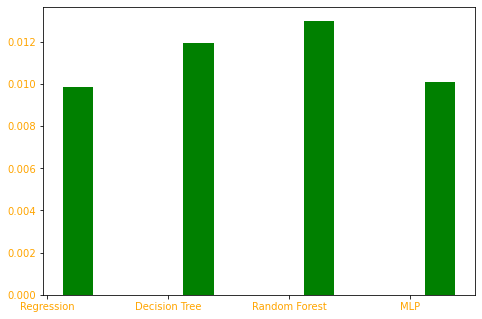

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.xticks(np.arange(len(names)), names, color='orange')
ax.set_xticklabels(names)
plt.yticks(color='orange')
plt.show()

In [76]:
scores_MLP

[0.8500470906187297,
 0.7787969370623644,
 0.7053150976618484,
 0.6351910241185864,
 0.566622988411613]

It is quite obvious that the score of the model decreases whenever the fraction of wrongly labeled data increases. The change in performance depends on the classifier that is used. Decision Tree seems to be more vulnerable to wrongly labeled data, while for the Random Forest the decrease in performance is relatively low. Also, the change in performance for MLP and Regression is linear, while for the other two methods it differs.

#### Discussion
Discuss how you could reduce the impact of wrongly labeled data or correct wrong labels. <br />
max. 400 words

Answer:

Crowdsourcing websites are getting more and more used for data-labeling. Since human labelers are not infallible and websites like Amazon Mechanical Turk also contains illegal bots or lazy humans wrongly labeled data should be taken into consideration by users. One solution would be to tackle the problem at its source and try to filter those answers out by using gold-standard questions. 
Whenever that is not possible, there are also ways in which the impact of label noise can be reduced within the data. Firstly, since models can overfit to noisy labels, making its performance lower, regularization can help to prevent this. Stronger regularization will lead to less overfitting. 
Another method would be to use a probability that a single entry get classified wrongly. Classifiers can be used to estimate the probability of a sample being wrongly labeled. 
The way in which wrongly labeled data should be treated is dependent on the type of dataset one is working with. If we're working with a big amount of low-quality data this should be treated differently then when we're working with a small quantity of high-quality data. Furthermore, the purpose of the classified data is important, for example when we are building a classifier that predicts whether someone has a lethal disease, wrongly classified data is more harmful than for example classifying whether it will rain or not. 

Authors: Youri Arkesteijn, Tim van der Horst and Kevin Chong.